# Lista 01 - Implementação dos métodos de passo básicos

Aluno: Pedro Henrique Cardoso Paulo

Professor: Ivan Menezes

Discuplina: MEC2403 - Otimização: Algoritmos e Aplicações na Engenharia (2023.1)

## Objetivos

O Objetivo deste notebook é ter a parte programática da Lista 01, correspondente à Questão 02.

## Pacotes básicos

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime

## Pacotes próprios

In [2]:
import sys
import os 
sys.path.insert(0, os.path.abspath('../packages'))
import steps

## Questão 02

### Enunciado

Utilizando os métodos implementados na questão anterior, testar a sua
implementação encontrando o ponto de mínimo das seguintes funções:

(a) Função-exemplo

\begin{equation}
   f(x_1, x_2) = x_1^2 - 3x_1x_2 + 4x_2^2 + x_1 - x_2, \ \mathbf{x^0} = [1,2]^T, \ \mathbf{d} = [-1,-2]^T
\end{equation}

(b) Função de McCormick

\begin{equation}
   f(x_1, x_2) = \sin{(x_1 + x_2)} + (x_1 - x_2)^2 - 1.5x_1 + 2.5x_2, \ \mathbf{x^0} = [-2,3]^T, \ \mathbf{d} = [1.453;-4.547]^T
\end{equation}

(c) Função de Himmelblau:

\begin{equation}
   f(x_1, x_2) = (x_1^2 + x_2 - 11)^2 + (x_1 + x_2^2 - 7)^2, \ \mathbf{x^0} = [0,5]^T, \ \mathbf{d} = [3,1.5]^T
\end{equation}

### Solução

#### Listando os steps

Como todas as funções usarão a mesma série de steps, vamos definí-los antes de executar os exemplos

In [3]:
step_list   = [steps.ConstantStep(da = 0.01, check_direction=False), 
               steps.BissectionStep(da = 0.01, tol = 1e-5, check_direction=False), 
               steps.GoldenSectionStep(da = 0.01, tol = 1e-5, check_direction=False)]

#### a.1 - Implementando a função

In [4]:
def f(x1, x2):

    return x1**2 - 3*x1*x2 + 4*x2**2 + x1 - x2

#### a.2 - Definindo $P_0$ e $d$

In [5]:
p_inicial = np.array([1, 2])
d = np.array([-1, -2])
d = d/np.linalg.norm(d)

#### a.3 - Plotando

Final do passo 1: ak = 2.130000, p_final = [0.047435\\ 0.094870\\ -0.022684].T. Execução:0:00:00.004276
Final do passo 2: ak = 2.134429, p_final = [0.045454\\ 0.090909\\ -0.022727].T. Execução:0:00:00.001571
Final do passo 3: ak = 2.134428, p_final = [0.045455\\ 0.090910\\ -0.022727].T. Execução:0:00:00.001464


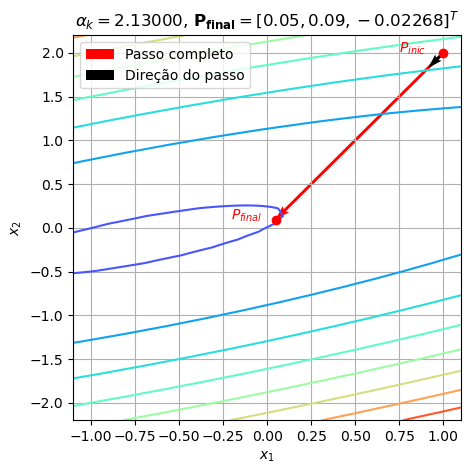

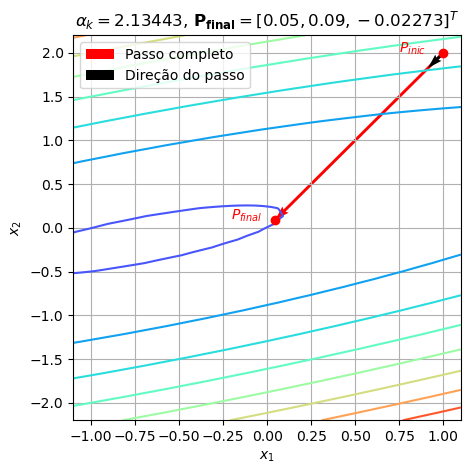

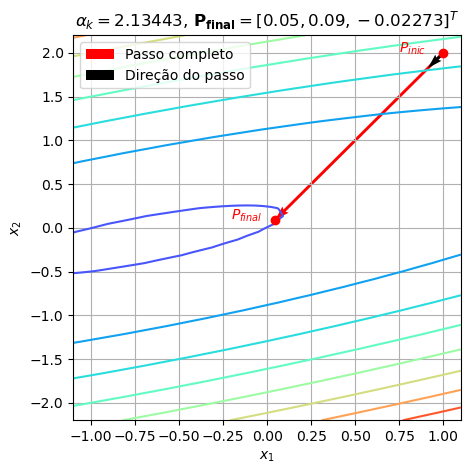

In [6]:
item = 'a'

x = np.linspace(-1.1, 1.1, 50)
y = np.linspace(-2.2, 2.2, 50)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

i = 0
for step in step_list:
    i += 1
    t_init = datetime.datetime.now()
    ak, p_final = step(p_inicial, d, f)
    t_final = datetime.datetime.now()
    print(f'Final do passo {i}: ak = {ak:.6f}, p_final = [{p_final[0]:.6f}\\\\ {p_final[1]:.6f}\\\\ {f(*p_final):.6f}].T. Execução:{t_final - t_init}')
    fig, ax = plt.subplots(1,1, figsize=(5, 5))
    ax.contour(X, Y, Z, cmap='rainbow')
    ax.plot(*p_inicial, 'ro')
    ax.text(p_inicial[0]-0.25, p_inicial[1], '$P_{inic}$', color='red')
    ax.plot(*p_final, 'ro')
    ax.text(p_final[0]-0.25, p_final[1], '$P_{final}$', color='red')
    ax.quiver(p_inicial[0], p_inicial[1], p_final[0]-p_inicial[0], p_final[1]-p_inicial[1], color='red', angles='xy', scale_units='xy', scale=1, label='Passo completo')
    ax.quiver(p_inicial[0], p_inicial[1], d[0], d[1], color='black', angles='xy', label='Direção do passo')
    ax.grid()
    ax.legend()
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_title(f'$\\alpha_k = {ak:.5f}$, $\mathbf{{P_{{final}}}} = [{p_final[0]:.2f}, {p_final[1]:.2f}, {f(*p_final):.5f}]^T$')
    fig.savefig(f'images/q2{item}_{i}.pdf')

#### b.1 - Implementando a função

In [7]:
def f(x1, x2):

    return np.sin(x1 + x2) + (x1 - x2)**2 - 1.5*x1 + 2.5*x2

#### b.2 - Definindo $P_0$ e $d$

In [8]:
p_inicial = np.array([-2, 3])
d = np.array([1.453, -4.547])
d = d/np.linalg.norm(d)

#### b.3 - Plotando

Final do passo 1: ak = 4.770000, p_final = [-0.548069\\ -1.543655\\ -2.913200].T. Execução:0:00:00.008040
Final do passo 2: ak = 4.773579, p_final = [-0.546980\\ -1.547064\\ -2.913223].T. Execução:0:00:00.003630
Final do passo 3: ak = 4.773577, p_final = [-0.546980\\ -1.547061\\ -2.913223].T. Execução:0:00:00.003753


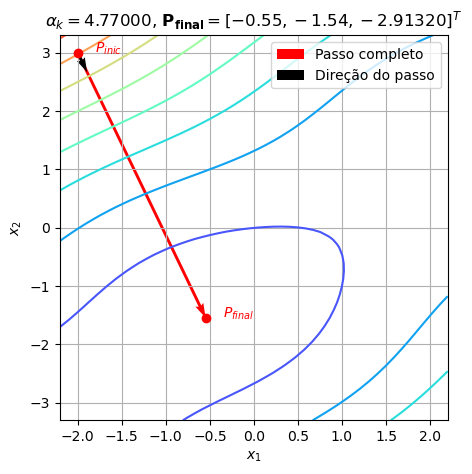

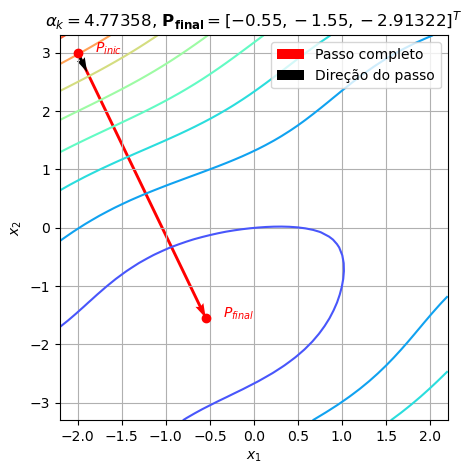

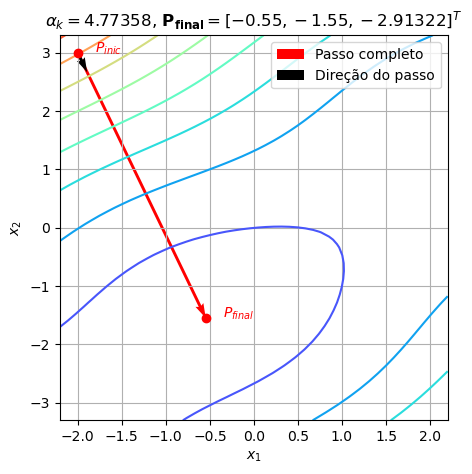

In [9]:
item = 'b'

x = np.linspace(-2.2, 2.2, 50)
y = np.linspace(-3.3, 3.3, 50)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

i = 0
for step in step_list:
    i += 1
    t_init = datetime.datetime.now()
    ak, p_final = step(p_inicial, d, f)
    t_final = datetime.datetime.now()
    print(f'Final do passo {i}: ak = {ak:.6f}, p_final = [{p_final[0]:.6f}\\\\ {p_final[1]:.6f}\\\\ {f(*p_final):.6f}].T. Execução:{t_final - t_init}')
    fig, ax = plt.subplots(1,1, figsize=(5, 5))
    ax.contour(X, Y, Z, cmap='rainbow')
    ax.plot(*p_inicial, 'ro')
    ax.text(p_inicial[0]+0.2, p_inicial[1], '$P_{inic}$', color='red')
    ax.plot(*p_final, 'ro')
    ax.text(p_final[0]+0.2, p_final[1], '$P_{final}$', color='red')
    ax.quiver(p_inicial[0], p_inicial[1], p_final[0]-p_inicial[0], p_final[1]-p_inicial[1], color='red', angles='xy', scale_units='xy', scale=1, label='Passo completo')
    ax.quiver(p_inicial[0], p_inicial[1], d[0], d[1], color='black', angles='xy', label='Direção do passo')
    ax.grid()
    ax.legend()
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_title(f'$\\alpha_k = {ak:.5f}$, $\mathbf{{P_{{final}}}} = [{p_final[0]:.2f}, {p_final[1]:.2f}, {f(*p_final):.5f}]^T$')
    fig.savefig(f'images/q2{item}_{i}.pdf')

#### c.1 - Implementando a função

In [10]:
def f(x1, x2):

    return (x1**2 + x2 - 11)**2 + (x1 + x2**2 - 7)**2

#### c.2 - Definindo $P_0$ e $d$

In [11]:
p_inicial = np.array([0, 5])
d = np.array([3, 1.5])
d = d/np.linalg.norm(d)

#### c.3 - Plotando

Final do passo 1: ak = 0.000000, p_final = [0.000000\\ 5.000000\\ 360.000000].T. Execução:0:00:00.000092
Final do passo 2: ak = 0.000005, p_final = [0.000004\\ 5.000002\\ 360.000917].T. Execução:0:00:00.000135
Final do passo 3: ak = 0.000004, p_final = [0.000003\\ 5.000002\\ 360.000689].T. Execução:0:00:00.000140


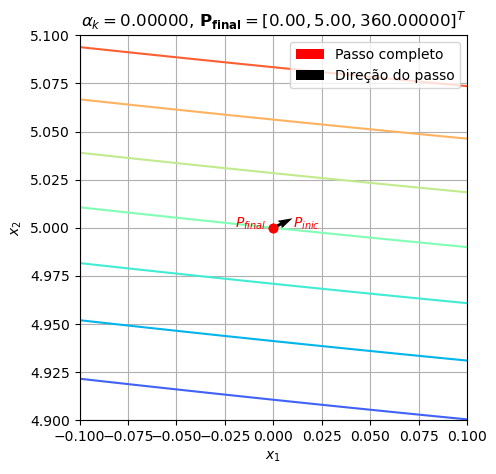

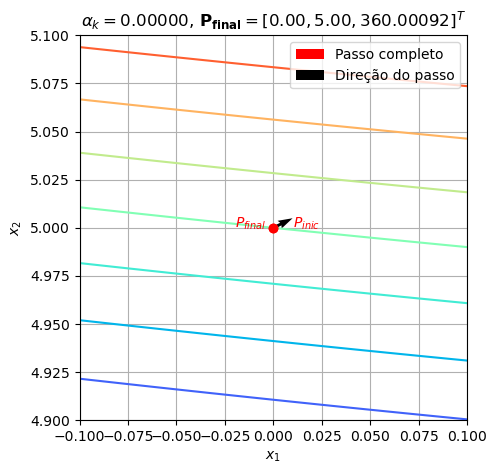

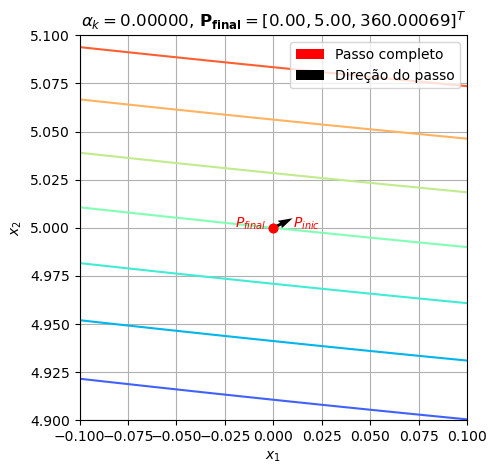

In [12]:
item = 'c'

x = np.linspace(-0.1, 0.1, 50)
y = np.linspace(4.9, 5.1, 50)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

i = 0
for step in step_list:
    i += 1
    t_init = datetime.datetime.now()
    ak, p_final = step(p_inicial, d, f)
    t_final = datetime.datetime.now()
    print(f'Final do passo {i}: ak = {ak:.6f}, p_final = [{p_final[0]:.6f}\\\\ {p_final[1]:.6f}\\\\ {f(*p_final):.6f}].T. Execução:{t_final - t_init}')
    fig, ax = plt.subplots(1,1, figsize=(5, 5))
    ax.contour(X, Y, Z, cmap='rainbow')
    ax.plot(*p_inicial, 'ro')
    ax.text(p_inicial[0]+0.01, p_inicial[1], '$P_{inic}$', color='red')
    ax.plot(*p_final, 'ro')
    ax.text(p_final[0]-0.02, p_final[1], '$P_{final}$', color='red')
    ax.quiver(p_inicial[0], p_inicial[1], p_final[0]-p_inicial[0], p_final[1]-p_inicial[1], color='red', angles='xy', scale_units='xy', scale=1, label='Passo completo')
    ax.quiver(p_inicial[0], p_inicial[1], d[0], d[1], color='black', angles='xy', label='Direção do passo')
    ax.grid()
    ax.legend()
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_title(f'$\\alpha_k = {ak:.5f}$, $\mathbf{{P_{{final}}}} = [{p_final[0]:.2f}, {p_final[1]:.2f}, {f(*p_final):.5f}]^T$')
    fig.savefig(f'images/q2{item}_{i}.pdf')

In [13]:
step_list   = [steps.ConstantStep(da = 0.01, check_direction=True), 
               steps.BissectionStep(da = 0.01, tol = 1e-5, check_direction=True), 
               steps.GoldenSectionStep(da = 0.01, tol = 1e-5, check_direction=True)]

Final do passo 1: ak = -3.390000, p_final = [-3.032108\\ 3.483946\\ 7.248700].T. Execução:0:00:00.002499
Final do passo 2: ak = -3.392163, p_final = [-3.034043\\ 3.482979\\ 7.248492].T. Execução:0:00:00.002810
Final do passo 3: ak = -3.392163, p_final = [-3.034043\\ 3.482978\\ 7.248492].T. Execução:0:00:00.002401


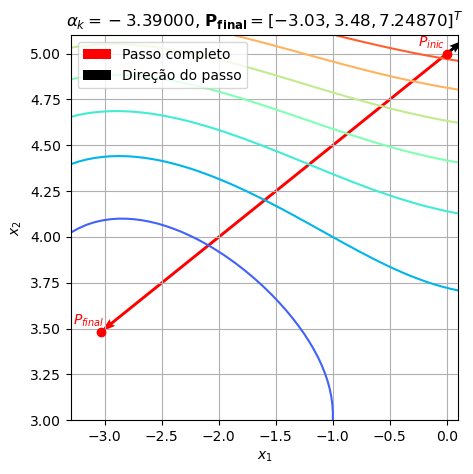

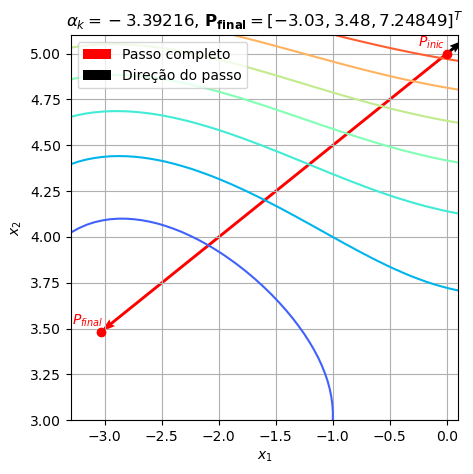

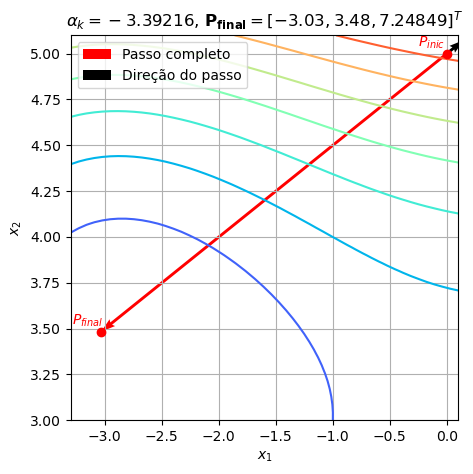

In [14]:
item = 'c2'

x = np.linspace(-3.3, 0.1, 50)
y = np.linspace(3, 5.1, 50)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

i = 0
for step in step_list:
    i += 1
    t_init = datetime.datetime.now()
    ak, p_final = step(p_inicial, d, f)
    t_final = datetime.datetime.now()
    print(f'Final do passo {i}: ak = {ak:.6f}, p_final = [{p_final[0]:.6f}\\\\ {p_final[1]:.6f}\\\\ {f(*p_final):.6f}].T. Execução:{t_final - t_init}')
    fig, ax = plt.subplots(1,1, figsize=(5, 5))
    ax.contour(X, Y, Z, cmap='rainbow')
    ax.plot(*p_inicial, 'ro')
    ax.text(p_inicial[0]-0.25, p_inicial[1]+0.04, '$P_{inic}$', color='red')
    ax.plot(*p_final, 'ro')
    ax.text(p_final[0]-0.25, p_final[1]+0.04, '$P_{final}$', color='red')
    ax.quiver(p_inicial[0], p_inicial[1], p_final[0]-p_inicial[0], p_final[1]-p_inicial[1], color='red', angles='xy', scale_units='xy', scale=1, label='Passo completo')
    ax.quiver(p_inicial[0], p_inicial[1], d[0], d[1], color='black', angles='xy', label='Direção do passo')
    ax.grid()
    ax.legend()
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_title(f'$\\alpha_k = {ak:.5f}$, $\mathbf{{P_{{final}}}} = [{p_final[0]:.2f}, {p_final[1]:.2f}, {f(*p_final):.5f}]^T$')
    fig.savefig(f'images/q2{item}_{i}.pdf')